In [1]:
from coding_library import *

In [2]:
print(zero_coupon_bond(100, 0.05, 5))

78.35261664684589


In [3]:

yield_curve = BootstrapYieldCurve()
yield_curve.add_instrument(100, 0.25, 0., 97.5)
yield_curve.add_instrument(100, 0.5, 0., 94.9)
yield_curve.add_instrument(100, 1.0, 0., 90.)
yield_curve.add_instrument(100, 1.5, 8, 96., 2)
yield_curve.add_instrument(100, 2., 12, 101.6, 2)
y = yield_curve.get_zero_rates()
x = yield_curve.get_maturities()

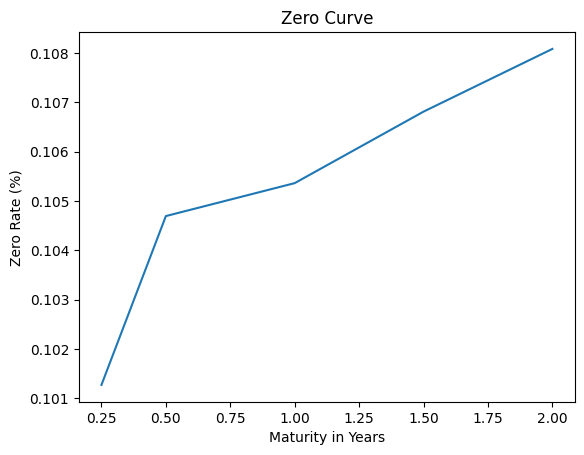

In [5]:
plt.plot(x, y)
plt.title("Zero Curve")
plt.ylabel("Zero Rate (%)")
plt.xlabel("Maturity in Years")
plt.show()

In [2]:
fr = ForwardRates()
fr.add_spot_rate(0.25, 10.127)
fr.add_spot_rate(0.50, 10.469)
fr.add_spot_rate(1.00, 10.536)
fr.add_spot_rate(1.50, 10.681)
fr.add_spot_rate(2.00, 10.808)
print(fr.get_forward_rates())

[10.810999999999998, 10.603, 10.971, 11.189]


In [2]:
ytm = bond_ytm(95.0428, 100, 1.5, 5.75, 2)
ytm

0.09369155345239477

In [3]:
bond_price(100, 1.5, ytm, 5.75, 2)

95.04280000000004

In [2]:
bond_mod_duration(95.04, 100, 1.5, 5.75, 2, 0.01)

1.3921788121706968

In [3]:
bond_convexity(95.0428, 100, 1.5, 5.75, 2)

2.6339593903438367

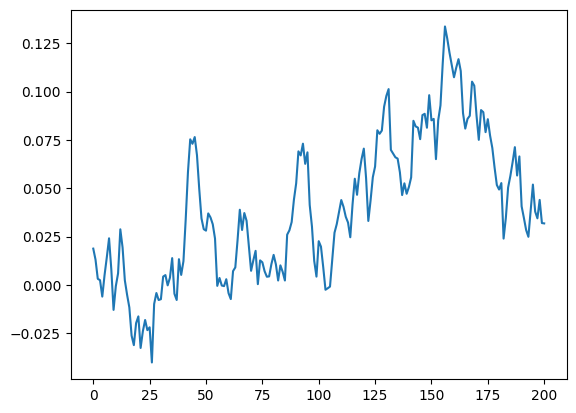

In [4]:
x, y = vasicek(0.01875, 0.20, 0.01, 0.012, 10., 200)

plt.plot(x,y)
plt.show()

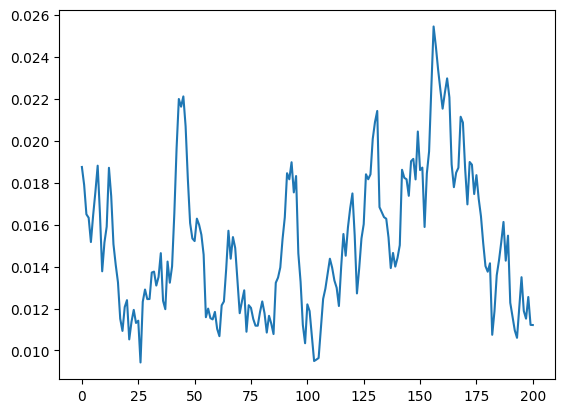

In [2]:
x, y = cir(0.01875, 0.20, 0.01, 0.012, 10., 200)

plt.plot(x,y)
plt.show()

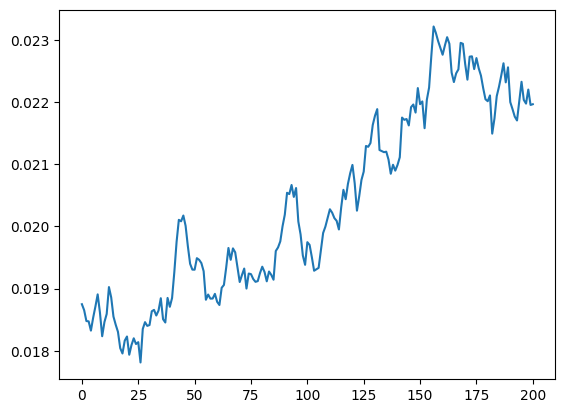

In [2]:
x, y = rendleman_bartter(0.01875, 0.01, 0.012, 10., 200)

plt.plot(x,y)
plt.show()

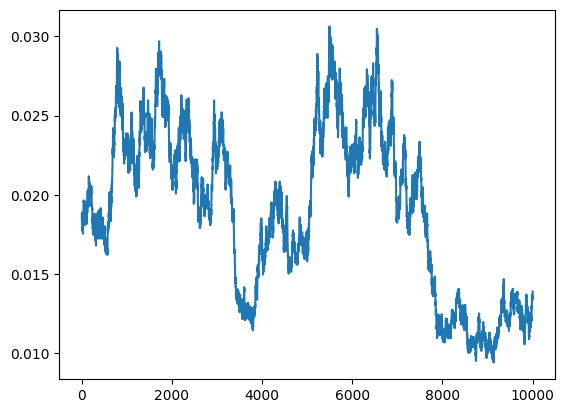

In [2]:
x, y = brennan_schwartz(0.01875, 0.20, 0.01, 0.012, 10., 10000)
plt.plot(x,y)
plt.show()

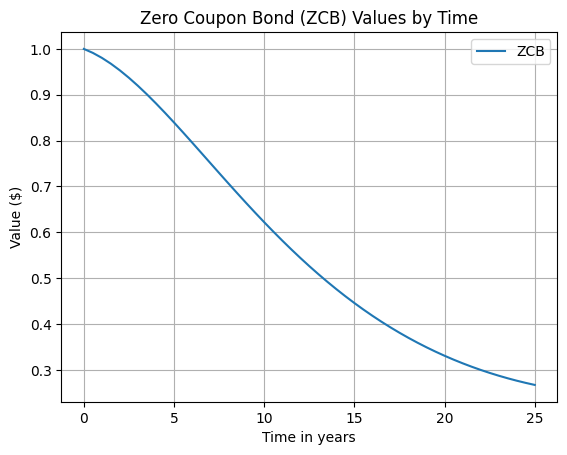

In [3]:
Ts = np.r_[0.0:25.5:0.5]
zcbs = [exact_zcb(0.5, 0.02, 0.03, t, 0.015) for t in Ts]

plt.title("Zero Coupon Bond (ZCB) Values by Time")
plt.plot(Ts, zcbs, label='ZCB')
plt.ylabel("Value ($)")
plt.xlabel("Time in years")
plt.legend()
plt.grid(True)
plt.show()

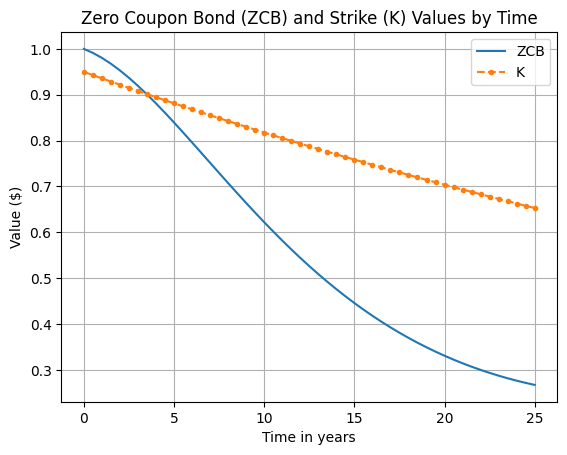

In [2]:
Ts = np.r_[0.0:25.5:0.5]
Ks = [exercise_value(0.95, 0.015, t) for t in Ts]
zcbs = [exact_zcb(0.5, 0.02, 0.03, t, 0.015) for t in Ts]

plt.title("Zero Coupon Bond (ZCB) and Strike (K) Values by Time")
plt.plot(Ts, zcbs, label='ZCB')
plt.plot(Ts, Ks, label='K', linestyle="--", marker=".")
plt.ylabel("Value ($)")
plt.xlabel("Time in years")
plt.legend()
plt.grid(True)
plt.show()

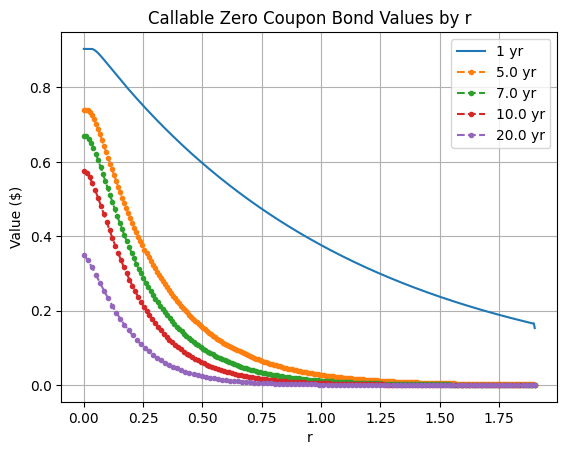

In [4]:
r0 = 0.05
R = 0.05
ratio = 0.95
sigma = 0.03
kappa = 0.15


theta = 0.05
prob = 1e-6
M = 250
max_policy_iter=10
grid_struct_interval = 0.25
rs = np.r_[0.0:2.0:0.1]

Vasicek = VasicekCZCB()
r, vals = Vasicek.vasicek_czcb_values(r0, R, ratio, 1.,sigma, kappa, theta,M, prob, max_policy_iter, grid_struct_interval, rs)
plt.title("Callable Zero Coupon Bond Values by r")
plt.plot(r, vals, label='1 yr')

for T in [5., 7., 10., 20.]:
    r, vals = Vasicek.vasicek_czcb_values(r0, R, ratio, T,sigma, kappa,theta, M, prob,max_policy_iter,grid_struct_interval,rs)
    plt.plot(r, vals, label=str(T)+' yr',
    linestyle="--", marker=".")

plt.ylabel("Value ($)")
plt.xlabel("r")
plt.legend()
plt.grid(True)
plt.show()
